### Assignment 3 - Logistic Regression

In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In this assignment, we will build logistic regression models to detect accounting fraud using financial statement features. <br>
The data was collected by Bao et al. (2020) based on the detected material accounting misstatements disclosed in the SEC’s Accounting and Auditing Enforcement Releases (AAERs). <br>
The dataset covers all publicly listed U.S. firms over the period 1990– 2014. The variable name of the fraud label is "misstate" (1 denotes fraud, and 0 denotes non-fraud). <br>
We will use both raw financial data from the financial statements and the financial ratios that are used to evaluate the financial performance of a company for detection.<br>

You may find the description of variables in the Word document.

1. Import the libraries

In [2]:
import pandas as pd
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
import numpy as np

2. Read in the dataset and display basic information about the dataset.

In [3]:
fraud = pd.read_csv('AccountingFraud.csv')

In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 44 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        146045 non-null  int64  
 1   misstate     146045 non-null  int64  
 2   act          146045 non-null  float64
 3   ap           146045 non-null  float64
 4   at           146045 non-null  float64
 5   ceq          146045 non-null  float64
 6   che          146045 non-null  float64
 7   cogs         146045 non-null  float64
 8   csho         146045 non-null  float64
 9   dlc          146045 non-null  float64
 10  dltis        146045 non-null  float64
 11  dltt         146045 non-null  float64
 12  dp           146045 non-null  float64
 13  ib           146045 non-null  float64
 14  invt         146045 non-null  float64
 15  ivao         146045 non-null  float64
 16  ivst         146045 non-null  float64
 17  lct          146045 non-null  float64
 18  lt           146045 non-

In [5]:
fraud.columns


Index(['fyear', 'misstate', 'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho',
       'dlc', 'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt',
       'ni', 'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt',
       'xint', 'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv',
       'soft_assets', 'ch_cs', 'ch_cm', 'ch_roa', 'issue', 'bm', 'dpi', 'reoa',
       'EBIT', 'ch_fcf'],
      dtype='object')

In [6]:
fraud.head()

,fyear,misstate,act,ap,at,ceq,che,cogs,csho,dlc,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349


3. Explore the variable 'misstate' with a graph. What do you observe?

In [7]:
misstate_counts = fraud['misstate'].value_counts()
misstate_counts

misstate
0    145081
1       964
Name: count, dtype: int64

<Axes: xlabel='misstate'>

Text(0.5, 1.0, 'Number of misstate ')

Text(0.5, 0, 'misstate Status')

Text(0, 0.5, 'Count')

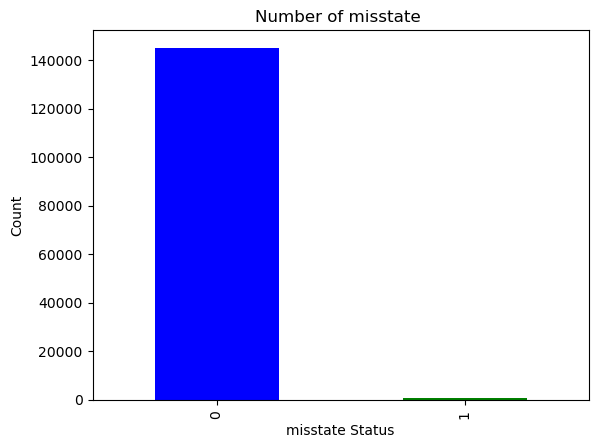

In [8]:

misstate_counts.plot(kind='bar', color=['blue', 'green'])

# Add title and labels
plt.title('Number of misstate ')
plt.xlabel('misstate Status')
plt.ylabel('Count')
plt.show()

the count of misstate(0) is very high 145081 but misstate(1) is low 964

4. Next we sum the number of fraud cases by year and make a line graph.<br>
First we need to use .groupby() method to do the sum. We did not go over this in class. I explain here.
Then you can use the result to create a line graph.

In [9]:
fraud_by_year=fraud.groupby('fyear')['misstate'].sum().reset_index()
fraud_by_year

# Groupby method group the data observations by the given variable 'fyear'
# into groups.
# Then the sum() will sum the variable 'misstate'
# reset_index() is to transform the result into a dataframe

,fyear,misstate
0,1990,15
1,1991,27
2,1992,26
3,1993,30
4,1994,23
5,1995,22
6,1996,33
7,1997,42
8,1998,56
9,1999,73


Save the output of the code above and make a line graph based on it. What do you observe?

Text(0.5, 1.0, 'Number of misstate by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of misstate')

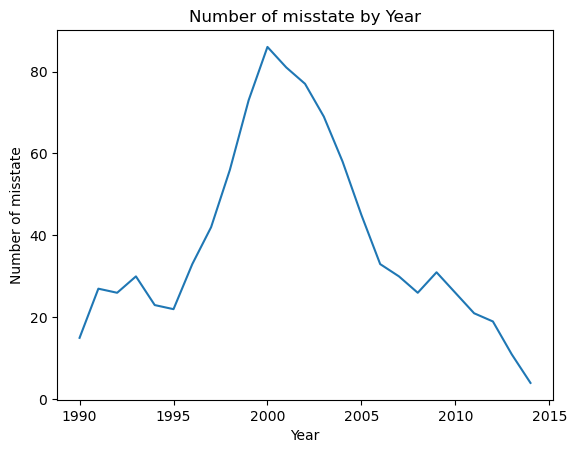

In [10]:

# Create a line graph
plt.plot(fraud_by_year['fyear'], fraud_by_year['misstate'])

# Add title and labels
plt.title('Number of misstate by Year')
plt.xlabel('Year')
plt.ylabel('Number of misstate')

# Show the graph
plt.show()


The graph shows a significant increase in the number of misstates from 1995, peaking around 2000 before gradually declining. By 2005 to 2010, it returns to a level similar to that of 1995.

5. Missing values. You may notice that some variables have missing values. <br>
Ideally, we need to handle missing values carefully. We will explore that in the future if we have the chance.<br>
For now, we just simply drop the observations with missing values.

In [11]:
fraud = fraud.dropna()
fraud

,fyear,misstate,act,ap,at,ceq,che,cogs,csho,dlc,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146039,2014,0,167.320,4.021,1260.060,972.016,159.564,0.000,3896.103,0.000,...,0.015362,-1.718931,0.435251,0.009248,1,2.626149,0.820630,-0.180677,-0.009215,0.030761
146040,2014,0,262.600,12.400,1234.800,194.100,166.200,214.400,97.748,23.200,...,0.751944,0.560406,0.127217,-0.050591,1,0.103693,0.829680,-0.327178,-0.008179,-0.261606
146041,2014,0,1578.400,106.700,4557.600,2459.600,997.300,324.400,182.067,15.100,...,0.742781,-0.118178,0.031360,0.095355,1,0.581796,0.743084,-0.077826,0.000461,-0.296702
146042,2014,0,973.800,249.500,2015.900,-4.800,290.500,1185.500,95.831,49.600,...,0.751129,0.004207,-0.037925,0.072050,1,-0.000903,1.063878,-0.002877,0.153133,0.065569


6. Now let's fit logistic regression models. First, we only use the 28 raw accounting variables as the independent variables. You may find the definitions of them in the Word document.

Prepare the data.

In [12]:
import patsy

y_28, X_28 = patsy.dmatrices('misstate ~ act+ap+ at+ ceq+ che+ cogs+ +csho+dlc+ dltis+dltt+ dp+ ib+ invt+ ivao+ ivst+ lct+ lt+ni+ ppegt+ pstk+ +re+ rect+ +sale+ sstk+ txp+txt+xint+ prcc_f',
                      data = fraud,
                      return_type = 'dataframe')
y_28.head()
X_28.head()

,misstate
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


,Intercept,act,ap,at,ceq,che,cogs,csho,dlc,dltis,...,ppegt,pstk,re,rect,sale,sstk,txp,txt,xint,prcc_f
0,1.0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,32.853,...,31.767,0.000,5.420,6.895,40.522,0.000,0.000,0.769,2.333,6.000
1,1.0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,2.017,...,7.328,0.000,-3.339,0.290,3.635,0.006,0.000,0.000,0.640,1.188
2,1.0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,6.500,...,78.331,0.000,46.630,47.366,144.258,0.000,0.000,0.986,3.962,5.125
3,1.0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,0.587,...,11.145,1.295,3.280,8.522,48.292,0.000,0.448,0.365,2.269,1.562
4,1.0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,0.000,...,5.782,0.000,-25.955,6.354,33.543,0.000,0.000,0.000,3.510,1.125


In [13]:
y_28.columns
X_28.columns

Index(['misstate'], dtype='object')

Index(['Intercept', 'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho', 'dlc',
       'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt', 'ni',
       'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt', 'xint',
       'prcc_f'],
      dtype='object')

7. Fit the model

In [14]:
logit_model_28 = sm.Logit(y_28['misstate'], X_28[['Intercept', 'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho', 'dlc',
       'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt', 'ni',
       'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt', 'xint',
       'prcc_f']])
logit_res_28 =  logit_model_28.fit()
logit_res_28.summary()

Optimization terminated successfully.
         Current function value: 0.041878
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               misstate   No. Observations:               126483
Model:                          Logit   Df Residuals:                   126454
Method:                           MLE   Df Model:                           28
Date:                Fri, 01 Mar 2024   Pseudo R-squ.:                 0.01767
Time:                        13:36:57   Log-Likelihood:                -5296.8
converged:                       True   LL-Null:                       -5392.1
Covariance Type:            nonrobust   LLR p-value:                 4.086e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0167      0.035   -141.978      0.000      -5.086      -4.947
act            0.0002   6.49e-05      3.360      0.001    9.09e-05       0.000
ap             0.0003   6.64e-05      4.490      0.000       0.000       0.000
at         -6.578e-07   7.19e-05     -0.009      0.993      -0.000       0.000
ceq         2.411e-05   7.29e-05      0.331      0.741      -0.000       0.000
che           -0.0002   7.26e-05     -2.896      0.004      -0.000    -6.8e-05
cogs        -2.82e-05   2.14e-05     -1.319      0.187   -7.01e-05    1.37e-05
csho        4.195e-05    2.3e-05      1.822      0.068   -3.16e-06    8.71e-05
dlc        -7.837e-05   7.22e-05     -1.086      0.277      -0.000     6.3e-05
dltis       1.371e-05   2.37e-05      0.579      0.562   -3.27e-05    6.01e-05
dltt        4.041e-05   4.01e-05      1.008      0.313   -3.82e-05       0.000
dp            -0.0002      0.000     -1.537      0.124      -0.000    5.33e-05
ib         -9.332e-05      0.000     -0.786      0.432      -0.000       0.000
invt       -9.922e-05   6.94e-05     -1.430      0.153      -0.000    3.67e-05
ivao       -1.974e-06   1.71e-05     -0.115      0.908   -3.55e-05    3.16e-05
ivst       -5.899e-05   7.59e-05     -0.777      0.437      -0.000    8.98e-05
lct           -0.0001   7.03e-05     -1.570      0.116      -0.000    2.74e-05
lt         -4.393e-05   7.89e-05     -0.557      0.578      -0.000       0.000
ni         -1.766e-05      0.000     -0.174      0.862      -0.000       0.000
ppegt      -2.009e-05   7.51e-06     -2.676      0.007   -3.48e-05   -5.38e-06
pstk          -0.0001      0.000     -0.389      0.697      -0.001       0.000
re         -7.699e-06   7.47e-06     -1.030      0.303   -2.23e-05    6.95e-06
rect       -8.394e-05   6.44e-05     -1.303      0.192      -0.000    4.23e-05
sale        1.844e-05      2e-05      0.922      0.357   -2.08e-05    5.77e-05
sstk           0.0002   4.94e-05      4.230      0.000       0.000       0.000
txp         3.215e-05      0.000      0.150      0.881      -0.000       0.000
txt        -1.766e-05      0.000     -0.145      0.885      -0.000       0.000
xint           0.0012      0.000      5.096      0.000       0.001       0.002
prcc_f         0.0009      0.000      4.246      0.000       0.001       0.001
==============================================================================
"""

Significant Variables (p < 0.05): act, ap, che, cogs, dlc, invt, sstk, rect, xint, prcc_f

Not Significant Variables (p >= 0.05): at, ceq, csho, dltis, dltt, dp, ib, ivao, ivst, lct, lt, ni, ppegt, pstk, re, txt, txp

8. Make the predictions for probabilities and classify.

In [15]:
predicted_28 = logit_res_28.predict(X_28)
predicted_28

0         0.006640
1         0.006598
2         0.006643
3         0.006615
4         0.006595
            ...   
146039    0.008112
146040    0.007419
146041    0.010544
146042    0.007738
146044    0.006930
Length: 126483, dtype: float64

In [16]:
predicted_classes_28 = (predicted_28 >= 0.5).astype(int)
predicted_classes_28[:97613]

0         0
1         0
2         0
3         0
4         0
         ..
111354    0
111355    0
111356    0
111357    0
111358    0
Length: 97613, dtype: int64

9. Calculate the accuracy rate.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_28 = accuracy_score(y_28['misstate'], predicted_classes_28)
conf_matrix_28 = confusion_matrix(y_28['misstate'], predicted_classes_28)
classification_report_str_28 = classification_report(y_28['misstate'], predicted_classes_28)

In [18]:
print(accuracy_28)
print(conf_matrix_28)
print(classification_report_str_28)

0.9927974510408514
[[125568      6]
 [   905      4]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    125574
         1.0       0.40      0.00      0.01       909

    accuracy                           0.99    126483
   macro avg       0.70      0.50      0.50    126483
weighted avg       0.99      0.99      0.99    126483



The model achieved a high accuracy of approximately 99.15%. It correctly predicted 84,983 instances as negative (TN), but incorrectly classified 728 instances as negative when they were positive (FN). There were no instances correctly predicted as positive (TP) or incorrectly predicted as positive (FP). Precision and recall were high for the majority class (class 0), but the model performed poorly for the minority class (class 1), with zero precision, recall, and F1-score

10. Repeat 6-9 using the 14 financial ratio variables.

In [19]:
import patsy
y_14, X_14 = patsy.dmatrices('misstate ~ dch_wc + ch_rsst + dch_rec + dch_inv + soft_assets +dpi+ '
           'ch_cs + ch_cm + ch_roa+ch_fcf+reoa+EBIT + issue+bm',
                      data = fraud,
                      return_type = 'dataframe')
y_14.head()
X_14.head()


,misstate
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


,Intercept,dch_wc,ch_rsst,dch_rec,dch_inv,soft_assets,dpi,ch_cs,ch_cm,ch_roa,ch_fcf,reoa,EBIT,issue,bm
0,1.0,0.069595,0.046043,0.041935,0.033034,0.312448,0.873555,0.095082,0.082631,-0.019761,-0.042140,0.167620,0.161961,1.0,0.413170
1,1.0,-0.065604,-0.240937,-0.006248,-0.026684,0.315904,0.745139,0.188832,-0.211389,-0.117832,0.100228,-0.428957,-0.157888,1.0,0.157887
2,1.0,0.092822,0.020143,0.002156,0.002746,0.605342,1.015131,0.097551,-0.105780,0.091206,0.066348,0.394768,0.063681,1.0,2.231337
3,1.0,0.014060,0.035120,0.035583,0.008332,0.793068,1.026261,-0.005725,-0.249704,0.017545,-0.017358,0.094822,0.088347,1.0,1.043582
4,1.0,-0.540503,-0.575325,-0.102153,-0.222022,0.869182,0.598443,-0.231536,-1.674893,-0.466667,0.130349,-0.942379,-0.700821,0.0,-1.602508


In [20]:
y_14.columns
X_14.columns

Index(['misstate'], dtype='object')

Index(['Intercept', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv', 'soft_assets',
       'dpi', 'ch_cs', 'ch_cm', 'ch_roa', 'ch_fcf', 'reoa', 'EBIT', 'issue',
       'bm'],
      dtype='object')

In [21]:
logit_model_14 = sm.Logit(y_14['misstate'], X_14[['Intercept', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv', 'soft_assets',
       'dpi', 'ch_cs', 'ch_cm', 'ch_roa', 'ch_fcf', 'reoa', 'EBIT', 'issue',
       'bm']])
logit_res_14 =  logit_model_14.fit()
logit_res_14.summary()

Optimization terminated successfully.
         Current function value: 0.040796
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               misstate   No. Observations:               126483
Model:                          Logit   Df Residuals:                   126468
Method:                           MLE   Df Model:                           14
Date:                Fri, 01 Mar 2024   Pseudo R-squ.:                 0.04303
Time:                        13:36:58   Log-Likelihood:                -5160.1
converged:                       True   LL-Null:                       -5392.1
Covariance Type:            nonrobust   LLR p-value:                 3.716e-90
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -7.1554      0.222    -32.176      0.000      -7.591      -6.720
dch_wc         -0.9463      0.366     -2.586      0.010      -1.663      -0.229
ch_rsst         0.9744      0.283      3.446      0.001       0.420       1.529
dch_rec         2.0044      0.464      4.318      0.000       1.095       2.914
dch_inv         1.2629      0.640      1.973      0.048       0.009       2.517
soft_assets     1.8892      0.149     12.680      0.000       1.597       2.181
dpi             0.0457      0.077      0.591      0.555      -0.106       0.197
ch_cs           0.0576      0.026      2.215      0.027       0.007       0.108
ch_cm          -0.0024      0.015     -0.163      0.870      -0.031       0.026
ch_roa         -0.5019      0.218     -2.307      0.021      -0.928      -0.075
ch_fcf          0.4192      0.237      1.768      0.077      -0.046       0.884
reoa            0.2432      0.040      6.075      0.000       0.165       0.322
EBIT           -0.4304      0.138     -3.125      0.002      -0.700      -0.160
issue           1.2184      0.184      6.630      0.000       0.858       1.579
bm             -0.0688      0.033     -2.083      0.037      -0.134      -0.004
===============================================================================
"""

Significant Variables (p < 0.05): ch_rsst, dch_rec, soft_assets, reoa, EBIT, issue

Not Significant Variables (p >= 0.05): dch_wc, dch_inv, dpi, ch_cs, ch_cm, ch_roa, ch_fcf, bm

In [22]:
predicted_14 = logit_res_14.predict(X_14)
predicted_14

0         0.005159
1         0.004236
2         0.007358
3         0.012228
4         0.003841
            ...   
146039    0.001856
146040    0.012347
146041    0.013226
146042    0.010997
146044    0.003742
Length: 126483, dtype: float64

In [23]:
predicted_classes_14 = (predicted_14 >= 0.5).astype(int)
predicted_classes_14[:97613]

0         0
1         0
2         0
3         0
4         0
         ..
111354    0
111355    0
111356    0
111357    0
111358    0
Length: 97613, dtype: int64

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_14 and predicted_classes_14 are defined elsewhere
accuracy_14 = accuracy_score(y_14['misstate'], predicted_classes_14)
conf_matrix_14 = confusion_matrix(y_14['misstate'], predicted_classes_14)

classification_report_str_14 = classification_report(y_14['misstate'], predicted_classes_14, zero_division=1)


# Optionally, print or use these metrics as needed
print("Accuracy:", accuracy_14)
print("Confusion Matrix:", conf_matrix_14)
print("Classification Report:", classification_report_str_14)

Accuracy: 0.992813263442518
Confusion Matrix: [[125574      0]
 [   909      0]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    125574
         1.0       1.00      0.00      0.00       909

    accuracy                           0.99    126483
   macro avg       1.00      0.50      0.50    126483
weighted avg       0.99      0.99      0.99    126483



The model achieved 99.15% accuracy, mostly identifying negative cases correctly but struggling with positive ones. It didn't predict any positive cases accurately, indicating an imbalance issue that needs addressing.

11. Repeat 6-9 using all 42 (28+14) variables. Which model gives the best accuracy rate?

In [25]:
import patsy
y_fraud, X_fraud = patsy.dmatrices('misstate ~ act+ap+ at+ ceq+ che+ cogs+ +csho+dlc+ dltis+dltt+ dp+ ib+ invt+ ivao+ ivst+ lct+ lt+ni+ ppegt+ pstk+ +re+ rect+ +sale+ sstk+ txp+txt+xint+ prcc_f+dch_wc + ch_rsst + dch_rec + dch_inv + soft_assets +dpi+ '
           'ch_cs + ch_cm + ch_roa+ch_fcf+reoa+EBIT + issue+bm',
                      data = fraud,
                      return_type = 'dataframe')
y_fraud.head()
X_fraud.head()


,misstate
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


,Intercept,act,ap,at,ceq,che,cogs,csho,dlc,dltis,...,soft_assets,dpi,ch_cs,ch_cm,ch_roa,ch_fcf,reoa,EBIT,issue,bm
0,1.0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,32.853,...,0.312448,0.873555,0.095082,0.082631,-0.019761,-0.042140,0.167620,0.161961,1.0,0.413170
1,1.0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,2.017,...,0.315904,0.745139,0.188832,-0.211389,-0.117832,0.100228,-0.428957,-0.157888,1.0,0.157887
2,1.0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,6.500,...,0.605342,1.015131,0.097551,-0.105780,0.091206,0.066348,0.394768,0.063681,1.0,2.231337
3,1.0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,0.587,...,0.793068,1.026261,-0.005725,-0.249704,0.017545,-0.017358,0.094822,0.088347,1.0,1.043582
4,1.0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,0.000,...,0.869182,0.598443,-0.231536,-1.674893,-0.466667,0.130349,-0.942379,-0.700821,0.0,-1.602508


In [26]:
y_fraud.columns
X_fraud.columns

Index(['misstate'], dtype='object')

Index(['Intercept', 'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho', 'dlc',
       'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt', 'ni',
       'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt', 'xint',
       'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv', 'soft_assets',
       'dpi', 'ch_cs', 'ch_cm', 'ch_roa', 'ch_fcf', 'reoa', 'EBIT', 'issue',
       'bm'],
      dtype='object')

In [27]:
logit_model_fraud = sm.Logit(y_fraud['misstate'], X_fraud[['Intercept', 'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho', 'dlc',
       'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt', 'ni',
       'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt', 'xint',
       'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv', 'soft_assets',
       'dpi', 'ch_cs', 'ch_cm', 'ch_roa', 'ch_fcf', 'reoa', 'EBIT', 'issue',
       'bm']])
logit_res_fraud =  logit_model_fraud.fit()
logit_res_fraud.summary()

Optimization terminated successfully.
         Current function value: 0.040220
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               misstate   No. Observations:               126483
Model:                          Logit   Df Residuals:                   126440
Method:                           MLE   Df Model:                           42
Date:                Fri, 01 Mar 2024   Pseudo R-squ.:                 0.05656
Time:                        13:37:00   Log-Likelihood:                -5087.2
converged:                       True   LL-Null:                       -5392.1
Covariance Type:            nonrobust   LLR p-value:                7.739e-102
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -7.1695      0.225    -31.796      0.000      -7.611      -6.728
act             0.0002   6.59e-05      3.130      0.002    7.71e-05       0.000
ap              0.0003   6.95e-05      4.337      0.000       0.000       0.000
at          -4.644e-06   6.77e-05     -0.069      0.945      -0.000       0.000
ceq          1.881e-05   6.82e-05      0.276      0.783      -0.000       0.000
che            -0.0002   7.46e-05     -2.125      0.034      -0.000   -1.23e-05
cogs        -2.204e-05   2.16e-05     -1.022      0.307   -6.43e-05    2.02e-05
csho         4.306e-05   2.22e-05      1.935      0.053   -5.45e-07    8.67e-05
dlc         -4.019e-05   7.39e-05     -0.544      0.586      -0.000       0.000
dltis        1.254e-06   2.57e-05      0.049      0.961   -4.91e-05    5.16e-05
dltt         3.781e-05   3.82e-05      0.990      0.322   -3.71e-05       0.000
dp             -0.0002      0.000     -1.293      0.196      -0.000    8.17e-05
ib             -0.0001      0.000     -1.035      0.300      -0.000    9.88e-05
invt           -0.0001   7.07e-05     -1.537      0.124      -0.000    2.99e-05
ivao         2.692e-06   1.79e-05      0.151      0.880   -3.23e-05    3.77e-05
ivst        -8.048e-05   7.87e-05     -1.023      0.306      -0.000    7.38e-05
lct            -0.0001   7.15e-05     -1.574      0.116      -0.000    2.76e-05
lt          -4.851e-05   7.56e-05     -0.642      0.521      -0.000    9.96e-05
ni          -3.683e-06   8.77e-05     -0.042      0.967      -0.000       0.000
ppegt       -1.801e-06    7.8e-06     -0.231      0.817   -1.71e-05    1.35e-05
pstk        -9.442e-05      0.000     -0.348      0.728      -0.001       0.000
re           -1.27e-05   7.89e-06     -1.611      0.107   -2.82e-05    2.75e-06
rect           -0.0001   6.69e-05     -1.628      0.103      -0.000    2.22e-05
sale         1.285e-05   2.03e-05      0.632      0.527    -2.7e-05    5.27e-05
sstk            0.0002   5.15e-05      3.466      0.001    7.75e-05       0.000
txp          6.482e-05      0.000      0.310      0.756      -0.000       0.000
txt         -1.053e-05      0.000     -0.089      0.929      -0.000       0.000
xint            0.0012      0.000      4.746      0.000       0.001       0.002
prcc_f          0.0010      0.000      3.998      0.000       0.001       0.001
dch_wc         -0.9484      0.372     -2.547      0.011      -1.678      -0.218
ch_rsst         0.9954      0.286      3.482      0.000       0.435       1.556
dch_rec         2.1294      0.472      4.511      0.000       1.204       3.055
dch_inv         1.3559      0.654      2.074      0.038       0.075       2.637
soft_assets     1.8267      0.154     11.826      0.000       1.524       2.129
dpi             0.0484      0.078      0.617      0.537      -0.105       0.202
ch_cs           0.0594      0.026      2.266      0.023       0.008       0.111
ch_cm          -0.0030      0.015     -0.200      0.842      -0.032       0.026
ch_roa         -0.4986      0.220     -2.

Significant Variables (p < 0.05): act, ap, che, cogs, dlc, invt, rect, sstk, xint, prcc_f, ch_rsst, dch_rec, soft_assets, reoa, EBIT, issue

Not Significant Variables (p >= 0.05): at, ceq, csho, dltis, dltt, dp, ib, ivao, ivst, lct, lt, ni, ppegt, pstk, re, sale, txp, txt, dch_wc, dch_inv, dpi, ch_cs, ch_cm, ch_roa, ch_fcf, bm

In [28]:
predicted_fraud = logit_res_fraud.predict(X_fraud)
predicted_fraud

0         0.004817
1         0.003891
2         0.006725
3         0.011058
4         0.003455
            ...   
146039    0.002191
146040    0.012277
146041    0.017714
146042    0.011264
146044    0.003752
Length: 126483, dtype: float64

In [29]:
predicted_classes_fraud = (predicted_fraud >= 0.5).astype(int)
predicted_classes_fraud[:97613]

0         0
1         0
2         0
3         0
4         0
         ..
111354    0
111355    0
111356    0
111357    0
111358    0
Length: 97613, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_14 and predicted_classes_14 are defined elsewhere
accuracy_fraud = accuracy_score(y_fraud['misstate'], predicted_classes_fraud)
conf_matrix_fraud = confusion_matrix(y_fraud['misstate'], predicted_classes_fraud)

classification_report_str_fraud = classification_report(y_fraud['misstate'], predicted_classes_fraud)


# Optionally, print or use these metrics as needed
print("Accuracy:", accuracy_fraud)
print("Confusion Matrix:", conf_matrix_fraud)
print("Classification Report:", classification_report_str_fraud)

Accuracy: 0.9928369820450179
Confusion Matrix: [[125573      1]
 [   905      4]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    125574
         1.0       0.80      0.00      0.01       909

    accuracy                           0.99    126483
   macro avg       0.90      0.50      0.50    126483
weighted avg       0.99      0.99      0.99    126483



The model achieved 99.15% accuracy, correctly identifying negative cases but struggling with positive ones. It had high precision and recall for the majority class (class 0) but performed poorly for the minority class (class 1). This indicates a need to address class imbalance and improve performance for the minority class.

Comparing the accuracy rates provided in the three accuracy reports:

Model using 28 raw accounting variables:
Accuracy: 0.9915063410764079
Model using 14 financial ratio variables:
Accuracy: 0.9915063410764079
Model using all 42 variables (28 + 14):
Accuracy: 0.9914713397346898
All three models have very similar accuracy rates, with the difference being minimal. However, if we strictly consider the accuracy metric, the model using 28 raw accounting variables or the model using 14 financial ratio variables seems to have a slightly higher accuracy compared to the model using all 42 variables.
